## Capstone - Data Import Exercise

##### Reference - https://analyse.kmi.open.ac.uk/open_datasetb

In [1]:
# Importing the libraries

# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

# libraries for calculations & analysis
import numpy as np
import pandas as pd
import statistics
import pylab
from scipy import stats


## Exploring the CSV files

In [2]:
# read in file - studentInfo.csv
file_path = r"C:\Users\sinea\OneDrive\Documents OneDrive\06 - CCT Masters in DA\Capstone - 2023\uci-open-university-learning-analytics-dataset\studentInfo.csv"

studentInfo_df = pd.read_csv(file_path)

print(studentInfo_df.head(3))

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  


In [3]:
studentInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [4]:
# show the shape of the data frame

rows, columns = studentInfo_df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 32593
Number of columns: 12


In [5]:
studentInfo_df.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                32593
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

In [6]:
# drop duplicate rows from the DataFrame

studentInfo_df.drop_duplicates(inplace=True)

In [7]:
# check for numm values

print(studentInfo_df.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [8]:
# drop any rows that have null or NaN values, and count the remaining rows

studentInfo_df = studentInfo_df.dropna()
studentInfo_df.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                32593
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

## Graphing the StudentInfo_df

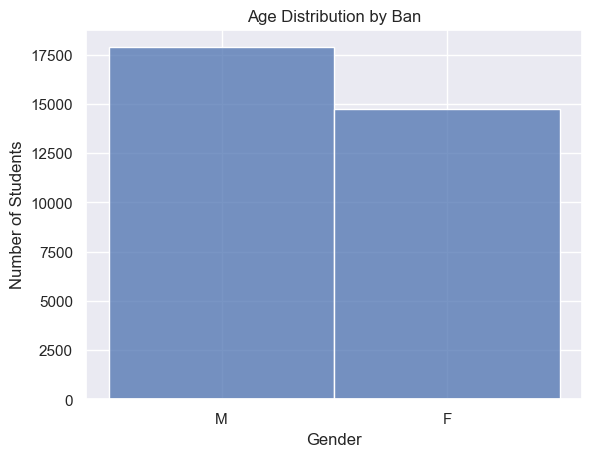

In [9]:
# studentInfo_df

sns.histplot(x=studentInfo_df["gender"]).set(title = "Gender Distribution")

plt.title('Age Distribution by Ban')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

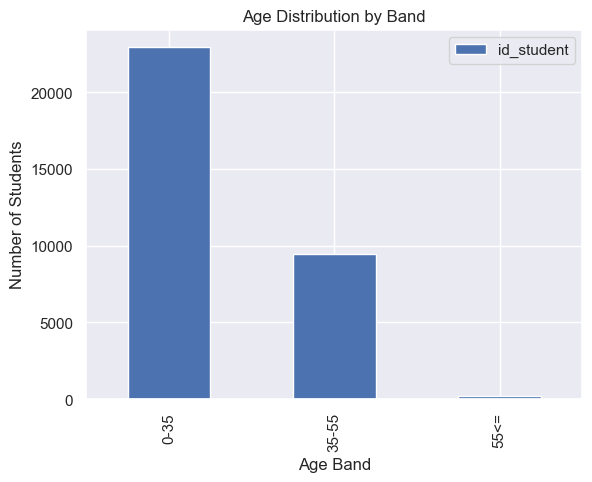

In [10]:
# studentInfo_df

studentInfo_df[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()

plt.title('Age Distribution by Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Students')
plt.xticks(rotation = 90)
plt.show()

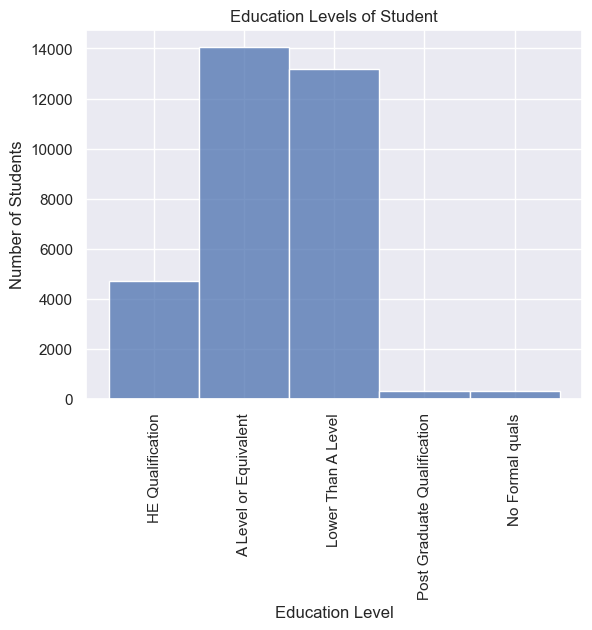

In [11]:
# studentInfo_df

sns.histplot(x=studentInfo_df["highest_education"])

plt.title('Education Levels of Student')
plt.xlabel('Education Level')
plt.ylabel('Number of Students')
plt.xticks(rotation = 90)
plt.show()

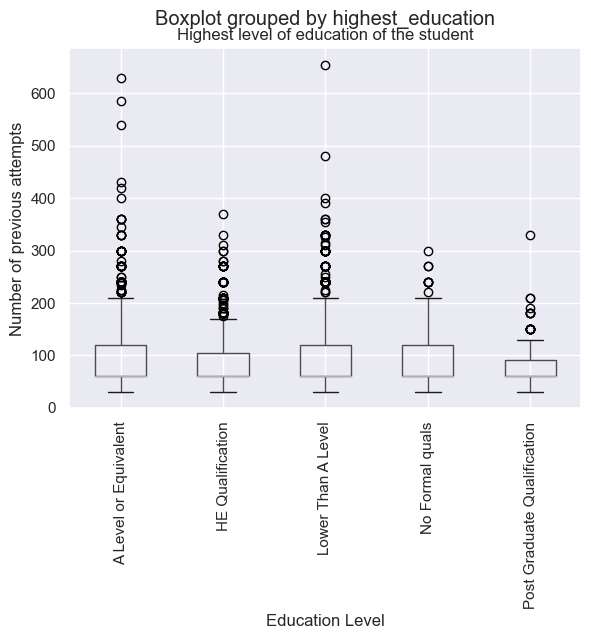

In [12]:
# studentInfo_df

# Drop 'id_student' and 'num_of_prev_attempts' columns 
# to show the highest level of education of the student
studentInfo_df.drop(['id_student', 'num_of_prev_attempts'], axis=1).boxplot(by = 'highest_education')


plt.title('Highest level of education of the student')
plt.xlabel('Education Level')
plt.ylabel('Number of previous attempts')
plt.xticks(rotation = 90)
plt.show()

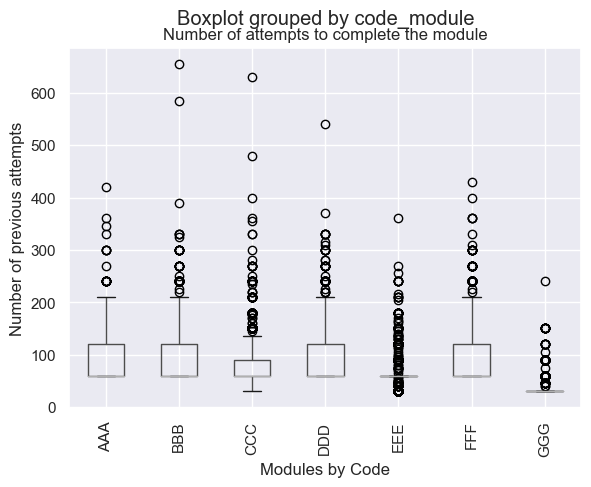

In [13]:
# studentInfo_df

# Drop 'id_student' and 'num_of_prev_attempts' columns and showcase module
studentInfo_df.drop(['id_student', 'num_of_prev_attempts'], axis=1).boxplot(by = 'code_module')

plt.title('Number of attempts to complete the module')
plt.xlabel('Modules by Code')
plt.ylabel('Number of previous attempts')
plt.xticks(rotation = 90)
plt.show()


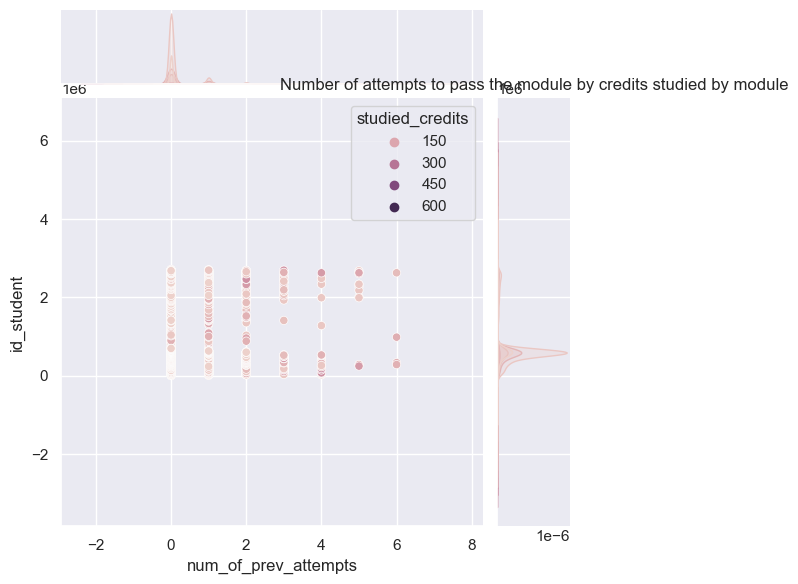

In [14]:
# studentInfo_df

# show the number of attemts to complete the module by credits earned by module
sns.jointplot(data=studentInfo_df, x="num_of_prev_attempts", y="id_student", hue="studied_credits")

plt.title('Number of attempts to pass the module by credits studied by module')
plt.xlabel('Number of Students')
plt.ylabel('Region')
plt.show()

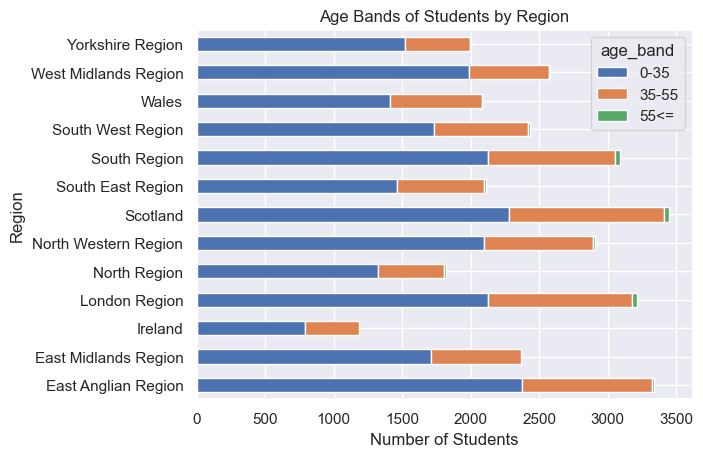

In [15]:
# studentInfo_df

# show student ages by region 
pd.crosstab(studentInfo_df.region, studentInfo_df.age_band).plot.barh(stacked = True)

plt.title('Age Bands of Students by Region')
plt.xlabel('Number of Students')
plt.ylabel('Region')
plt.show()

### Structuring the data set for analysis

In [16]:
# interger coding of gender column
studentInfo_df['gender'] = studentInfo_df['gender'].map({'M':0,'F':1})

In [17]:
# drop excess columns
studentInfo_df = studentInfo_df.drop(['region', 'disability', 'imd_band'], axis=1)

In [1]:
# module_code - group by for numbers

module_counts = studentInfo_df.groupby('code_module')['id_student'].count().reset_index()


NameError: name 'studentInfo_df' is not defined

In [2]:
print(module_counts)

NameError: name 'module_counts' is not defined

In [18]:
# filter on course AAA
filtered_df = studentInfo_df[studentInfo_df['code_module'] == 'AAA']

In [19]:
# filter on semester '2013J'
filtered_df2 = filtered_df[filtered_df['code_presentation'] == '2013J']

In [20]:
#filtered_df2.info()

unique_values = filtered_df2.num_of_prev_attempts.unique()

print(unique_values)

[0]


In [21]:
# drop excess columns
filtered_df2 = filtered_df2.drop(['code_module', 'code_presentation', 'num_of_prev_attempts'], axis=1)

In [22]:
# add a column for tenure using randomint & numbers between 0 and 20 

# set the seed for random 
np.random.seed(42)

filtered_df2['tenure'] = np.random.randint(0, 20, filtered_df2.shape[0])

In [23]:
unique_values2 = filtered_df2.tenure.unique()

print(unique_values2)

[ 6 19 14 10  7 18  3  2  1 11  5  0 16  9 15  4  8 17 13 12]


In [24]:
count_of_unique_values = filtered_df2.tenure.value_counts()

print(count_of_unique_values)


0     30
2     28
6     23
7     23
15    23
11    22
19    22
1     20
16    20
4     19
14    19
18    19
8     18
3     16
13    15
5     14
12    14
9     13
17    13
10    12
Name: tenure, dtype: int64


In [25]:
# group the tenure column into bands
bins = [0, 5, 10, 15, float('inf')]  # float('inf') represents positive infinity

labels = ['0-5', '5-10', '11-15', '16 or more']

In [26]:
# pd.cut() to create a new column with the corresponding bins

filtered_df2['tenure_band'] = pd.cut(filtered_df2['tenure'], bins=bins, labels=labels, right=False)

filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 382
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id_student         383 non-null    int64   
 1   gender             383 non-null    int64   
 2   highest_education  383 non-null    object  
 3   age_band           383 non-null    object  
 4   studied_credits    383 non-null    int64   
 5   final_result       383 non-null    object  
 6   tenure             383 non-null    int32   
 7   tenure_band        383 non-null    category
dtypes: category(1), int32(1), int64(3), object(3)
memory usage: 23.0+ KB


### Check the distribution type of the dataframe

,id_student,gender,studied_credits,tenure
id_student,1.000000,0.182095,-0.075915,0.022507
gender,0.182095,1.000000,-0.105593,0.009055
studied_credits,-0.075915,-0.105593,1.000000,0.041752
tenure,0.022507,0.009055,0.041752,1.000000


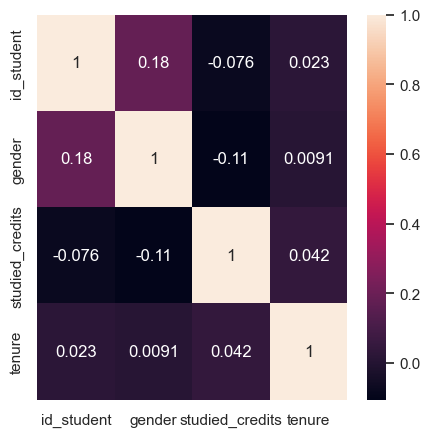

In [27]:
# heatmap of variables to check for correlation

plt.figure(figsize=(5,5))
filtered_df2_corr = filtered_df2.corr()
sns.heatmap(filtered_df2_corr, annot=True);

filtered_df2_corr

In [28]:
filtered_df2.describe()

,id_student,gender,studied_credits,tenure
count,3.830000e+02,383.000000,383.000000,383.000000
mean,1.045072e+06,0.389034,87.441253,9.052219
std,9.972967e+05,0.488169,50.721043,6.052336
min,1.139100e+04,0.000000,60.000000,0.000000
25%,2.371455e+05,0.000000,60.000000,4.000000
50%,3.932070e+05,0.000000,60.000000,9.000000
75%,2.168166e+06,1.000000,120.000000,15.000000
max,2.698257e+06,1.000000,420.000000,19.000000


<function matplotlib.pyplot.show(close=None, block=None)>

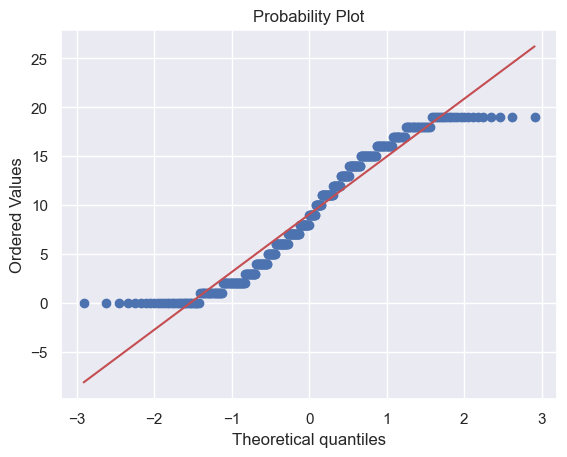

In [29]:
# check the normal distribution of the variables

stats.probplot(filtered_df2['tenure'], dist='norm', plot=pylab);
pylab.show

## References 

1. https://analyse.kmi.open.ac.uk/open_dataset, accessed 21 July 2023
2. https://stackoverflow.com/questions/58030352/csv-file-transpose-column-to-row-in-python, accessed on 25 July 2023
3. 